<a href="https://colab.research.google.com/github/Hakgyun-Hong/MachineLearning/blob/master/Multicollinearity_Detection_and_Remedy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#

# Collinearity
**Collinearity** is a situation where two features are linearly associated, and they are used as predictors for the target.

It's often measured using Pearson's corellation coefficient.

Collinearity between more than two predictors is also possible.

The term multicollinearity was first used by Ragnar Frisch.

Multicolinearity is a special case of collinearity where a feature exhibits a linear relationship with two or more features.

Partial multicollinearity is ubiquitous in multiple regression. Two random variables will almost always correlate at some level in a sample, even if they share no fundamental relationship in the large population. In other words, multicolinearity is a matter of degree.


# Consuquences of multicolinearity

Multicollinearity could result in significant problems during model fitting. It can reduce overall performance of regression and classification models.

>

1.   Does not increase bias, but it can increase variance(overfitting)
2.   make the estimates very sensitive to minor changes in the model.
3.   doesn't affect the predictive power, but individual predictor variable's impact on the response variable could be calculated wrongly.



The result is that the coefficient estimates are unstable and difficult to interpret. Multicollinearity saps the statistical power of analysis.

this can cause the coefficients to switch signss, and make it more difficult to specify to correct model also.

# Remedies of Multicollinearity problem.

1. Increase the sample size
2. Remove some of highly correlated featrues.


> *   VIF
*   RFE(Recursive Feature Elimination)
* PCA Decomposition


3. Replace highly correlated regressors with a linear combination of them.
4. keep the common sense regarding the feature engineering. understand what we are doing
5. Use regularization methods such as RIDGE, LASSO or Bayesian Regression.



## Import Library

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

%matplotlib inline

In [3]:
# Load Kaggle Data
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hakgyunhong","key":"b3dea254d6c31d36d7b64d9f4da54d4f"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
#!kaggle datasets download -d schirmerchad/bostonhoustingmlnd
!kaggle datasets download -d vikrishnan/boston-house-prices

  0% 0.00/12.8k [00:00<?, ?B/s]
100% 12.8k/12.8k [00:00<00:00, 38.1MB/s]


In [6]:
#!unzip bostonhoustingmlnd.zip
!unzip boston-house-prices.zip
!ls

Archive:  boston-house-prices.zip
  inflating: housing.csv             
boston-house-prices.zip  housing.csv  kaggle.json  sample_data


In [7]:
!kaggle datasets download -d yasserh/bmidataset

  0% 0.00/2.19k [00:00<?, ?B/s]
100% 2.19k/2.19k [00:00<00:00, 7.19MB/s]


In [8]:
!unzip bmidataset.zip
!ls

Archive:  bmidataset.zip
  inflating: bmi.csv                 
bmi.csv		boston-house-prices.zip  kaggle.json
bmidataset.zip	housing.csv		 sample_data


In [9]:
# Import Data
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
raw_boston = pd.read_csv('/content/housing.csv', header=None, delimiter = r"\s+", names=column_names)
#raw_boston = pd.read_csv('/content/housing.csv', header=None, names=column_names)

raw_bmi = pd.read_csv('/content/bmi.csv')

In [10]:
print(raw_bmi.head())
print(raw_boston.head())

   Gender  Height  Weight  Index
0    Male     174      96      4
1    Male     189      87      2
2  Female     185     110      4
3  Female     195     104      3
4    Male     149      61      3
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [11]:
# Creating Dummies for gender
raw_bmi['Gender'] = raw_bmi['Gender'].map({'Male':0, 'Female':1}) # by using map make dummies

# The correlation matrix

the correlation matrix gives you the pairwise correlation or bivariate relationship between two independent variables - collinearity.

Text(0.5, 1.0, 'BMI Correlation Heatmap')

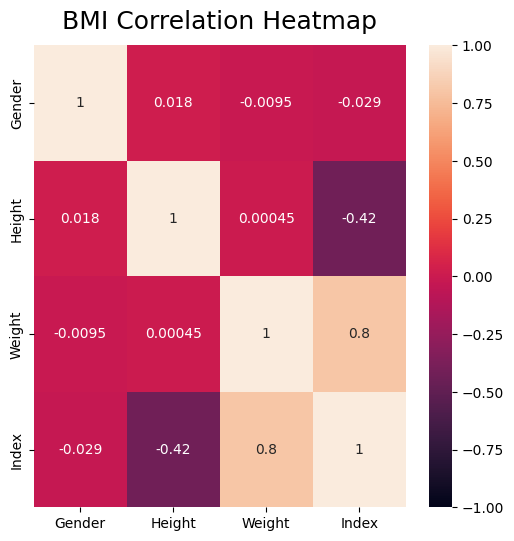

In [12]:
# BMI Correlation Heatmap
plt.figure(figsize=(6,6))
heatmap = sns.heatmap(raw_bmi.corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('BMI Correlation Heatmap', fontdict = {'fontsize':18}, pad=12)

Text(0.5, 1.0, 'Boston Correlation Heatmap')

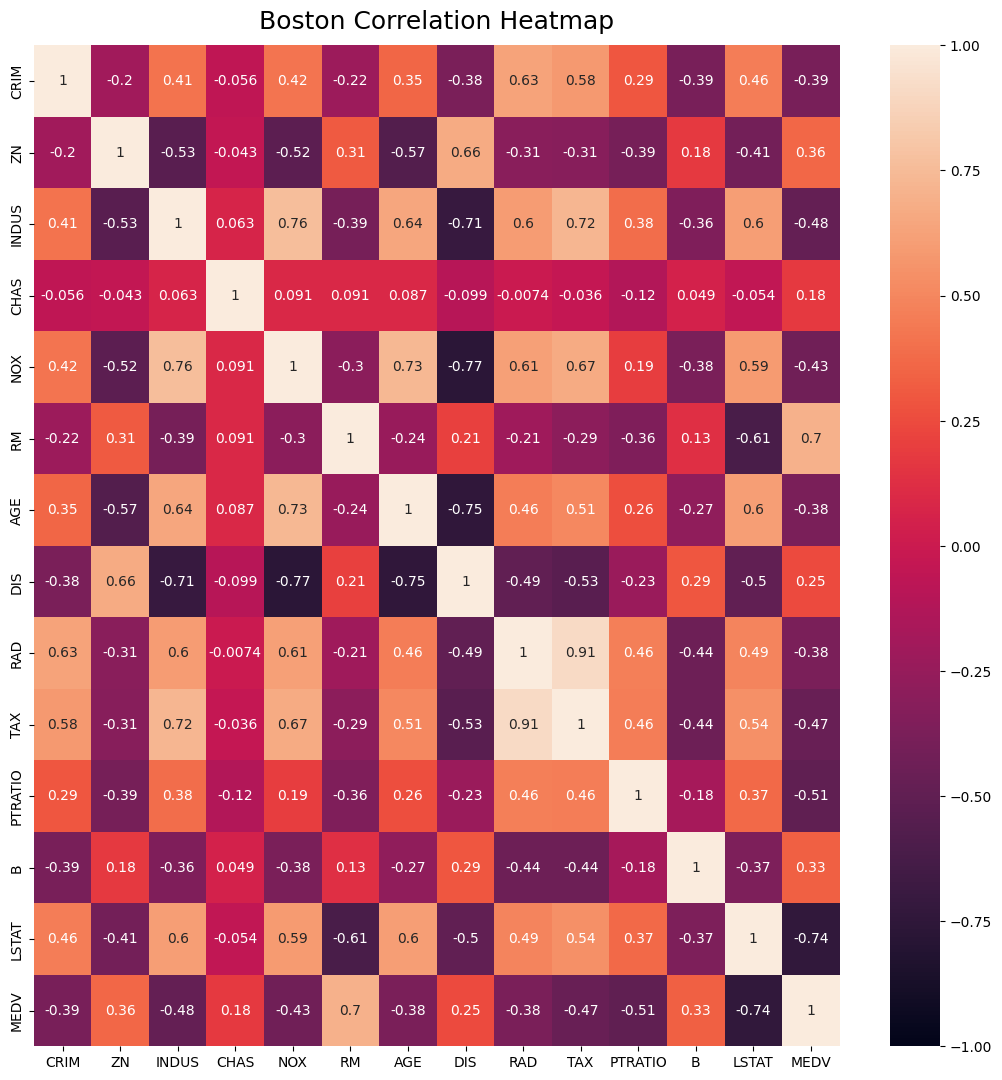

In [13]:
# Boston Correlation Heatmap
plt.figure(figsize=(13,13))
heatmap = sns.heatmap(raw_boston.corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Boston Correlation Heatmap', fontdict = {'fontsize':18}, pad=12)

## Clustermap
- Clustermap table shows not only correlation between variables, but also group(cluster) relationships.

<Figure size 400x400 with 0 Axes>

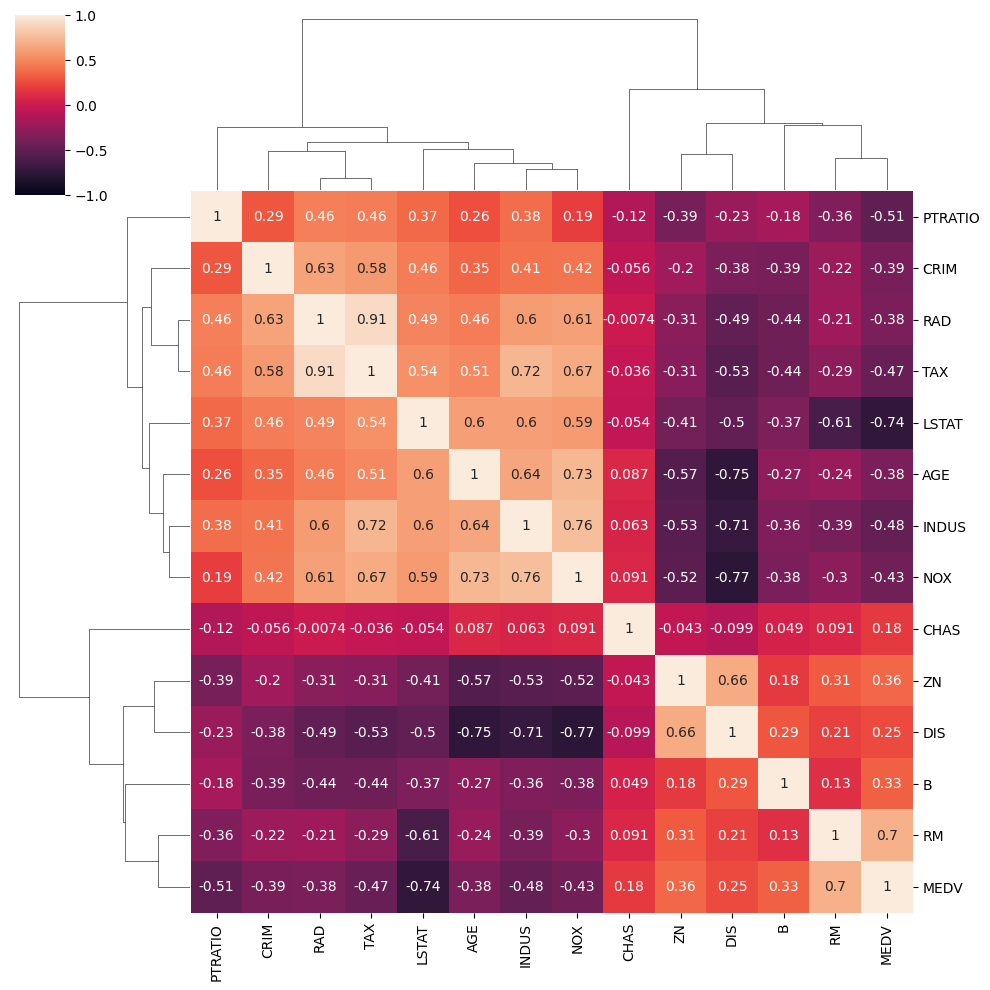

In [14]:
plt.figure(figsize=(4,4))
clustermap = sns.clustermap(raw_boston.corr(), vmin=-1, vmax=1,annot=True)

# VIF(Variance Inflation Factor)
- A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis.

- ex) VIF of 10 indicates that the existing multicollinearity is inflating the variance of the coefficient 10 times compared to a no multicollinearity model.

- Value of 4~5 is considered sometimes regarded as being moderate to high. Therefore a VIF = 5 is often taken as a threshold

## Two kinds of multicollinearity
1.   Data-based multicollinearity
- This type of multicollinearity is present in data itself. Observational experiments are likely to exhibit this kind of multicollinearity.

2.   Structural multicollinearity
- this is caused by new predictor variables. this type occures when we create a model term using other terms. In other words, It's a byproduct of model that we specify.

## Data-based multicollinearity

In [15]:
X = raw_bmi[['Gender','Height','Weight']]
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

  Feature        VIF
0  Gender   2.028864
1  Height  11.623103
2  Weight  10.688377


## Structural multicollinearity

In [16]:
X = raw_bmi[['Gender', 'Height', 'Weight', 'Index']]

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

vif_data["VIF"]= [ variance_inflation_factor(X.values, i ) for i in range(len(X.columns))]

print(vif_data)

  Feature        VIF
0  Gender   2.031010
1  Height  11.941301
2  Weight  40.024880
3   Index  25.143752


- from here, we could noticed that there is a significant

# Feature reduction in VIF

In [17]:
X2 = raw_boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

vif2_data = pd.DataFrame()
vif2_data["Feature"] = X2.columns

vif2_data["VIF"] = [variance_inflation_factor(X2.values, i) for i in range(len(X2.columns))]

print(vif2_data)

    Feature        VIF
0      CRIM   2.100373
1        ZN   2.844013
2     INDUS  14.485758
3      CHAS   1.152952
4       NOX  73.894947
5        RM  77.948283
6       AGE  21.386850
7       DIS  14.699652
8       RAD  15.167725
9       TAX  61.227274
10  PTRATIO  85.029547
11        B  20.104943
12    LSTAT  11.102025


- We have a huge VIF values here. Let's drop some highly correlated features in the next steps.

- Importance notice is that we should do that step by step, by dropping features one by one and checking results.

In [18]:
# We drop : 'PTRATIO'
X2 = raw_boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'B', 'LSTAT']]

vif2_data = pd.DataFrame()
vif2_data["Feature"] = X2.columns

vif2_data["VIF"] = [variance_inflation_factor(X2.values,i) for i in range(len(X2.columns))]

print(vif2_data)

   Feature        VIF
0     CRIM   2.099345
1       ZN   2.451624
2    INDUS  14.275283
3     CHAS   1.142167
4      NOX  73.894171
5       RM  60.598846
6      AGE  21.361234
7      DIS  12.221605
8      RAD  15.159162
9      TAX  59.301541
10       B  18.614751
11   LSTAT  10.138324


- It is changed significantly but it is still have high values for other features.

In [19]:
# Drop : 'NOX' 'RM' 'AGE' 'TAX' 'B'
X2 = raw_boston[['CRIM','ZN','INDUS','CHAS','DIS','RAD','LSTAT']]

vif2_data = pd.DataFrame()
vif2_data["Feature"] = X2.columns

vif2_data["VIF"] = [variance_inflation_factor(X2.values,i) for i in range(len(X2.columns))]
print(vif2_data)


  Feature       VIF
0    CRIM  2.067135
1      ZN  2.299351
2   INDUS  6.900077
3    CHAS  1.086574
4     DIS  3.968908
5     RAD  4.678181
6   LSTAT  6.726973


# Regression Models Performance Comparison

In [20]:
scaled_boston = raw_boston.copy()

In [21]:
from sklearn.preprocessing import StandardScaler

col_names = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
features = scaled_boston[col_names]

scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_boston[col_names] = features


In [22]:
X = scaled_boston.iloc[:,:-1].values
y = scaled_boston.iloc[:,-1].values

In [23]:
scaled_boston.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,0,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,0,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,0,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,0,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,0,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


# Linear Regression

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)

In [26]:
cv_lm = cross_val_score(estimator = lm, X=X_train, y=y_train, cv=10)

r2 = lm.score(X_test,y_test)
n = X_test.shape[0] # data length
p = X_test.shape[1] # num of feature

lm_adjusted_r2 = (1-(1-r2)*(n-1)/(n-p-1))
lm_RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
lm_R2 = lm.score(X_test,y_test)
lmCV_R2 = cv_lm.mean()

print('RMSE:',lm_RMSE)
print('R2:',lm_R2)
print('Adjusted R2:',lm_adjusted_r2)
print("Cross Validated R2:",cv_lm.mean())

RMSE: 4.638689926172823
R2: 0.7112260057484929
Adjusted R2: 0.6840226584639306
Cross Validated R2: 0.687534695114113


Text(0.5, 1.0, 'Linear regression with all features')

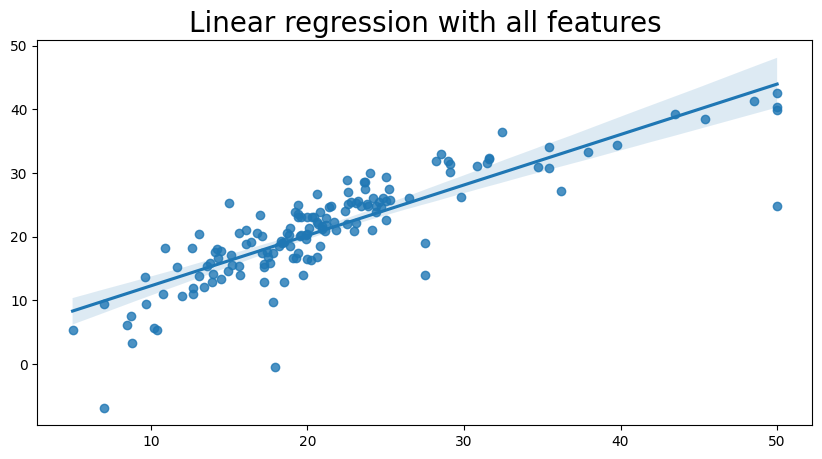

In [27]:
plt.figure(figsize=(10,5))
sns.regplot(x=y_test, y=y_pred)
plt.title('Linear regression with all features',fontsize = 20)

# Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

RandomForest_reg = RandomForestRegressor(n_estimators = 10, random_state=0)
RandomForest_reg.fit(X_train, y_train)

y_pred= RandomForest_reg.predict(X_test)

In [29]:
cv_rf = cross_val_score(estimator = RandomForest_reg, X=X_train, y=y_train, cv=10)

r2 = RandomForest_reg.score(X_test,y_test)
n = X_test.shape[0]
p = X_test.shape[1]

rf_adjusted_r2 = (1-(1-r2)*(n-1)/(n-p-1))
rf_RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
rf_R2 = lm.score(X_test,y_test)
rfCV_R2 = cv_rf.mean()

print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4) )
print('R2:', round( RandomForest_reg.score(X_test, y_test),4) )
print('Adjusted R2:', round(rf_adjusted_r2, 4) )
print("Cross Validated R2: ", round( cv_rf.mean(),4) )

RMSE: 3.3291
R2: 0.8513
Adjusted R2: 0.8373
Cross Validated R2:  0.8171


- RF is better than Linear model

----


# Dropping features using VIF

# Linear Model

In [30]:
scaled_boston2 = scaled_boston.copy()

In [31]:
scaled_boston2 = scaled_boston2.drop(['NOX','RM','AGE','TAX','PTRATIO','B'],axis=1)

In [32]:
scaled_boston2.head(5)

,CRIM,ZN,INDUS,CHAS,DIS,RAD,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,0,0.140214,-0.982843,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,0,0.557160,-0.867883,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,0,0.557160,-0.867883,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,0,1.077737,-0.752922,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,0,1.077737,-0.752922,-1.026501,36.2


In [33]:
X = scaled_boston2.iloc[:,:-1].values
y = scaled_boston2.iloc[:,-1].values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

y_pred = lm2.predict(X_test)

Text(0.5, 1.0, 'Linear regression after dropping features')

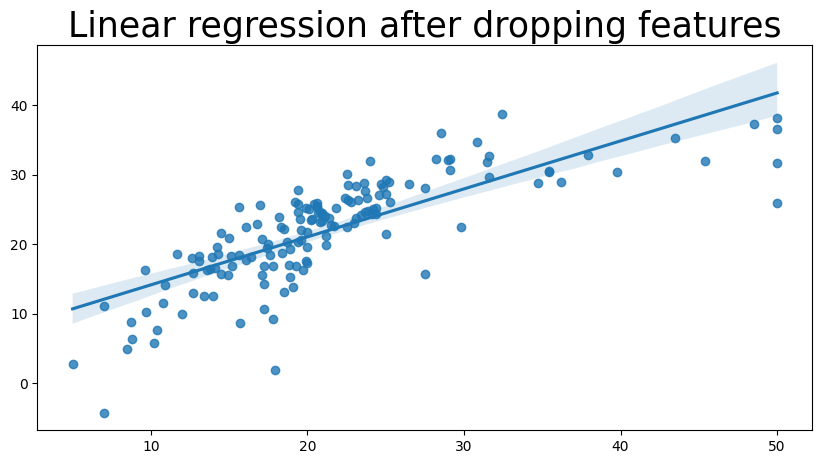

In [36]:
plt.figure(figsize=(10,5))
sns.regplot(x=y_test,y=y_pred)
plt.title('Linear regression after dropping features',fontsize=25)

In [37]:
cv_lm2 = cross_val_score(estimator = lm2, X = X_train, y=y_train, cv=10)
# get cross validation score.

r2 = lm2.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

lm2_adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
lm2_RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
lm2_R2 = lm2.score(X_test,y_test)
lm2CV_R2 = cv_lm2.mean()

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2:',lm2.score(X_test,y_test))
print('adjusted_r2:',lm2_adjusted_r2)
print('Cross Validated R2:',cv_lm2.mean())


RMSE: 5.457281513538772
R2: 0.6003129209564719
adjusted_r2: 0.5808836879474115
Cross Validated R2: 0.6060423089860112


# Random Forest with dropping features using VIF

In [38]:
RandomForest2_reg = RandomForestRegressor(n_estimators=10, random_state=0)
RandomForest2_reg.fit(X_train,y_train)

y_pred = RandomForest2_reg.predict(X_test)

In [39]:
cv_rf2 = cross_val_score(estimator = RandomForest2_reg, X=X_train, y=y_train, cv= 10)

r2 = RandomForest2_reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

rf2_adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
rf2_RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
rf2_R2 = RandomForest2_reg.score(X_test,y_test)
rf2CV_R2 = cv_rf2.mean()

print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R2:',RandomForest2_reg.score(X_test,y_test))
print('adjusted_r2:',rf2_adjusted_r2)
print('Cross Validated R2:',cv_rf2.mean())

RMSE: 4.406751847121104
R2: 0.7393818939595942
adjusted_r2: 0.7267129582492966
Cross Validated R2: 0.7553765441843016


# Recursive Feature elimination

- I remember that there are some ways to reduction of features.
- Foward Elimination, Backward Elimination
- We call this RFE(Recurive Feature Elimination)

----
This algorithm eliminate n features from a model by fitting the model multiple times and each steps.

by removing the weakest features, determined by either the 'coef_' or 'feature importances' attribute of the fitted model.

- RFE works by searching for a subset of features by starting with all features in the training dataset.

RFE is wrapper-type feature selection algorithm. This means that a different machine learning algorithm is given and used in the core of the method, is wrapped by RFE, and used to help select

**Not all models can be paired with RFE algorithm**. and some models benefit more from RFE than others. Because RFE requires that the initial model uses the full predictor set, then some of models can not be used when the number of predictors exceeds the number of samples.

These models include multiple linear models cannot be used when the number of predictors exceeds the number of samples. These models include multiple linear regression, logistic regression, and linear discriminant analysis



In [40]:
X = scaled_boston.iloc[:,:-1].values
y = scaled_boston.iloc[:,-1].values

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

# Create Pipeline
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select = 8)
model = RandomForestRegressor()
rf_pipeline = Pipeline(steps=[('s',rfe),('m',model)])

# fit and pred
rf_pipeline.fit(X_train,y_train)
y_pred = rf_pipeline.predict(X_test)

In [44]:
cv_rf_pipeline = cross_val_score(estimator = rf_pipeline, X=X_train, y=y_train, cv=10)

r2 = rf_pipeline.score(X_test,y_test)
n = X_test.shape[0]
p = X_test.shape[1]

rf_pipeline_adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
rf_pipeline_RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
rf_pipeline_R2 = rf_pipeline.score(X_test,y_test)
rf_pipelineCV_R2 = cv_rf_pipeline.mean()

print('RMSE:', rf_pipeline_RMSE)
print('R2:',rf_pipeline_R2)
print('Adjisted R2:',rf_pipeline_adjusted_r2)
print('Cross Validated R2:', rf_pipelineCV_R2)

RMSE: 3.173732977608213
R2: 0.8648213319230078
Adjisted R2: 0.8520871095679288
Cross Validated R2: 0.8139121314019307


In [49]:
rf_pipeline.named_steps.s.support_[:]

array([ True, False, False, False,  True,  True,  True,  True, False,
       False,  True,  True,  True])